<a href="https://colab.research.google.com/github/Navathamarkeeri/PROJECT/blob/ML/heart_attack_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/heart_attack_prediction_dataset_edit.csv')

In [ ]:
df.shape

(8763, 26)

In [ ]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67.0,m,208,158/88,72,0.0,0.0,1,0,...,6.615001,261404.0,31.251233,286,0,6.0,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21.0,male,389,165/93,98,1.0,1.0,1,1,...,4.963459,285768.0,27.194973,235,1,7.0,Canada,North America,Northern Hemisphere,0
2,BNI9906,21.0,Female,324,174/99,72,1.0,0.0,0,0,...,9.463426,235282.0,28.176571,587,4,4.0,France,Europe,Northern Hemisphere,0
3,JLN3497,84.0,NaN,383,163/100,73,1.0,1.0,1,0,...,7.648981,125640.0,36.464704,378,3,4.0,Canada,North America,Northern Hemisphere,0
4,GFO8847,66.0,Male,318,91/88,93,NaN,1.0,1,1,...,1.514821,160555.0,21.809144,231,1,5.0,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:

df = df.drop_duplicates(subset = 'Patient ID')

In [ ]:
df.dtypes

,0
Patient ID,object
Age,float64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,float64
Family History,float64
Smoking,int64
Obesity,int64


In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,2
Sex,1
Cholesterol,0
Blood Pressure,1
Heart Rate,0
Diabetes,1
Family History,1
Smoking,0
Obesity,0


In [ ]:



try:
    df[['Systolic_Blood Pressure', 'Diastolic_Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic_Blood Pressure'] = pd.to_numeric(df['Systolic_Blood Pressure'], errors='coerce')
    df['Diastolic_Blood Pressure'] = pd.to_numeric(df['Diastolic_Blood Pressure'], errors='coerce')

    print(df.head())
except:
    print("Error: 'Blood Pressure' column not found or data format is incorrect.")

  Patient ID   Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812  67.0       m          208         158/88          72       0.0   
1    CZE1114  21.0    male          389         165/93          98       1.0   
2    BNI9906  21.0  Female          324         174/99          72       1.0   
3    JLN3497  84.0     NaN          383        163/100          73       1.0   
4    GFO8847  66.0    Male          318          91/88          93       NaN   

   Family History  Smoking  Obesity  ...        BMI  Triglycerides  \
0             0.0        1        0  ...  31.251233            286   
1             1.0        1        1  ...  27.194973            235   
2             0.0        0        0  ...  28.176571            587   
3             1.0        1        0  ...  36.464704            378   
4             1.0        1        1  ...  21.809144            231   

  Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                            

In [ ]:
df.dtypes

,0
Patient ID,object
Age,float64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,float64
Family History,float64
Smoking,int64
Obesity,int64


In [ ]:


for i in ["Age","BMI","Cholesterol","Heart Rate",
          "Systolic_Blood Pressure","Diastolic_Blood Pressure"]:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
print(df.shape)

(8759, 28)


In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,1
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,1
Family History,1
Smoking,0
Obesity,0


In [ ]:
for i in ["Age","Sleep Hours Per Day","Sedentary Hours Per Day"]:
    df[i].fillna(df[i].mean(), inplace = True)

<ipython-input-17-bd92b6b17b91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace = True)


In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [ ]:
for i in ["Sex","Diabetes","Family History"]:
 df[i].fillna(df[i].mode()[0],inplace=True)


<ipython-input-19-4ed2605eb2cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [ ]:
for i in df.select_dtypes(include='object').columns:
 print(df[i].unique())

['BMW7812' 'CZE1114' 'BNI9906' ... 'XKA5925' 'EPE6801' 'ZWN9666']
['m' 'male' 'Female' 'Male']
['158/88' '165/93' '174/99' ... '137/94' '94/76' '119/67']
['Average' 'Unhealthy' 'Healthy' 'Healty']
['Argentina' 'Canada' 'France' 'Thailand' 'Japan' 'United States'
 'Vietnam' 'China' 'Italy' 'Brazil' 'Spain' 'India' 'Nigeria'
 'New Zealand' 'South Korea' 'Germany' 'Australia' 'South Africa'
 'Colombia' 'United Kingdom']
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']
['Southern Hemisphere' 'Northern Hemisphere']


In [ ]:
df['Sex'] = df['Sex'].replace({'m':'Male','male':'Male'})

In [ ]:
df['Diet'] = df['Diet'].replace({'Healty': 'Healthy'})

In [ ]:
df = df.drop(columns=['Blood Pressure'], errors='ignore') # Only drop 'Blood Pressure' if it exists
# Convert relevant columns to numeric type.
# Assuming 'Systolic_Blood Pressure' and 'Diastolic_Blood Pressure' are the problematic columns:
for col in ['Systolic_Blood Pressure', 'Diastolic_Blood Pressure']:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Remove rows with NaN values in relevant columns to avoid errors in correlation calculation.
df = df.dropna(subset=['Systolic_Blood Pressure', 'Diastolic_Blood Pressure']) # This line remains the same.

In [ ]:

encoded_data = pd.get_dummies(df, columns=[ 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere'], # Removed the trailing space from 'Smoking Status '
                              prefix=[ 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']) # Removed the trailing space from 'Smoking Status '
df = encoded_data
print(df.head())

  Patient ID   Age  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812  67.0          208          72       0.0             0.0   
1    CZE1114  21.0          389          98       1.0             1.0   
2    BNI9906  21.0          324          72       1.0             0.0   
3    JLN3497  84.0          383          73       1.0             1.0   
4    GFO8847  66.0          318          93       1.0             1.0   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        1        0                    0                 4.168189  ...   
1        1        1                    1                 1.813242  ...   
2        0        0                    0                 2.078353  ...   
3        1        0                    1                 9.828130  ...   
4        1        1                    0                 5.804299  ...   

   Country_United States  Country_Vietnam  Continent_Africa  Continent_Asia  \
0                  False            F

In [ ]:

df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems',
       ...
       'Country_United States', 'Country_Vietnam', 'Continent_Africa',
       'Continent_Asia', 'Continent_Australia', 'Continent_Europe',
       'Continent_North America', 'Continent_South America',
       'Hemisphere_Northern Hemisphere', 'Hemisphere_Southern Hemisphere'],
      dtype='object', length=8813)

In [ ]:
import pandas as pd
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
min_max_values = {}

for column in numerical_cols:
    min_value = df[column].min()
    max_value = df[column].max()
    min_max_values[column] = (min_value, max_value)

print(min_max_values)

{'Age': (18.0, 90.0), 'Cholesterol': (120, 400), 'Heart Rate': (40, 110), 'Diabetes': (0.0, 1.0), 'Family History': (0.0, 1.0), 'Smoking': (0, 1), 'Obesity': (0, 1), 'Alcohol Consumption': (0, 1), 'Exercise Hours Per Week': (0.002442348, 19.99870905), 'Previous Heart Problems': (0, 1), 'Medication Use': (0, 1), 'Stress Level': (1, 10), 'Sedentary Hours Per Day': (0.001263206, 11.99931341), 'Income': (20062.0, 299954.0), 'BMI': (18.00233658, 39.99721082), 'Triglycerides': (30, 800), 'Physical Activity Days Per Week': (0, 7), 'Sleep Hours Per Day': (4.0, 10.0), 'Heart Attack Risk': (0, 1), 'Systolic_Blood Pressure': (90.0, 180.0), 'Diastolic_Blood Pressure': (60.0, 110.0)}


In [ ]:
import json
with open('min_max_values.json', 'w') as json_file:
  json.dump(min_max_values, json_file)

In [ ]:
df.drop(columns=['Patient ID'], inplace=True)

In [ ]:
df.corr()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
Age,1.000000,-0.009503,-0.003988,-0.014040,0.007984,0.395010,-0.007878,-0.006959,0.001284,0.000603,...,0.016452,-0.004195,0.016435,0.001153,-0.004168,-0.012370,0.012485,-0.006916,0.002705,-0.002705
Cholesterol,-0.009503,1.000000,0.000072,-0.013514,-0.021931,0.016309,-0.014414,-0.007686,0.021672,-0.006509,...,0.024679,0.012709,-0.008909,0.002856,-0.015143,0.004075,0.011400,0.002110,0.019385,-0.019385
Heart Rate,-0.003988,0.000072,1.000000,0.006698,-0.013439,-0.012366,0.012904,0.003304,0.008081,-0.005131,...,-0.007244,-0.002958,0.007845,-0.011264,0.013253,-0.004524,-0.003736,0.005124,-0.010047,0.010047
Diabetes,-0.014040,-0.013514,0.006698,1.000000,-0.014020,0.000414,0.013038,0.005450,-0.007006,0.000697,...,0.006467,0.004290,-0.002928,0.005088,-0.013116,0.010016,0.007915,-0.011611,-0.001377,0.001377
Family History,0.007984,-0.021931,-0.013439,-0.014020,1.000000,0.011672,-0.000984,0.012285,-0.006573,-0.005032,...,0.028344,-0.007936,-0.001356,0.000325,-0.001283,-0.017805,0.025054,0.002655,0.003998,-0.003998
Smoking,0.395010,0.016309,-0.012366,0.000414,0.011672,1.000000,0.004048,0.012709,-0.000145,-0.000653,...,0.005704,0.010241,0.012531,0.002859,-0.003443,0.004461,-0.009267,-0.008840,-0.002392,0.002392
Obesity,-0.007878,-0.014414,0.012904,0.013038,-0.000984,0.004048,1.000000,-0.023785,0.001814,0.005621,...,0.000914,0.005149,0.002788,-0.004235,-0.000275,0.000287,0.005509,-0.001637,0.008728,-0.008728
Alcohol Consumption,-0.006959,-0.007686,0.003304,0.005450,0.012285,0.012709,-0.023785,1.000000,-0.008230,0.009978,...,0.017929,0.007417,-0.001919,0.004233,-0.017504,-0.000827,0.011201,0.002638,0.011900,-0.011900
Exercise Hours Per Week,0.001284,0.021672,0.008081,-0.007006,-0.006573,-0.000145,0.001814,-0.008230,1.000000,0.005542,...,0.004829,0.002645,0.011039,-0.005644,-0.008524,0.004809,0.005602,-0.005354,0.008066,-0.008066
Previous Heart Problems,0.000603,-0.006509,-0.005131,0.000697,-0.005032,-0.000653,0.005621,0.009978,0.005542,1.000000,...,0.005664,0.007779,-0.013169,-0.022443,0.022578,0.001356,0.013956,0.007140,-0.017560,0.017560


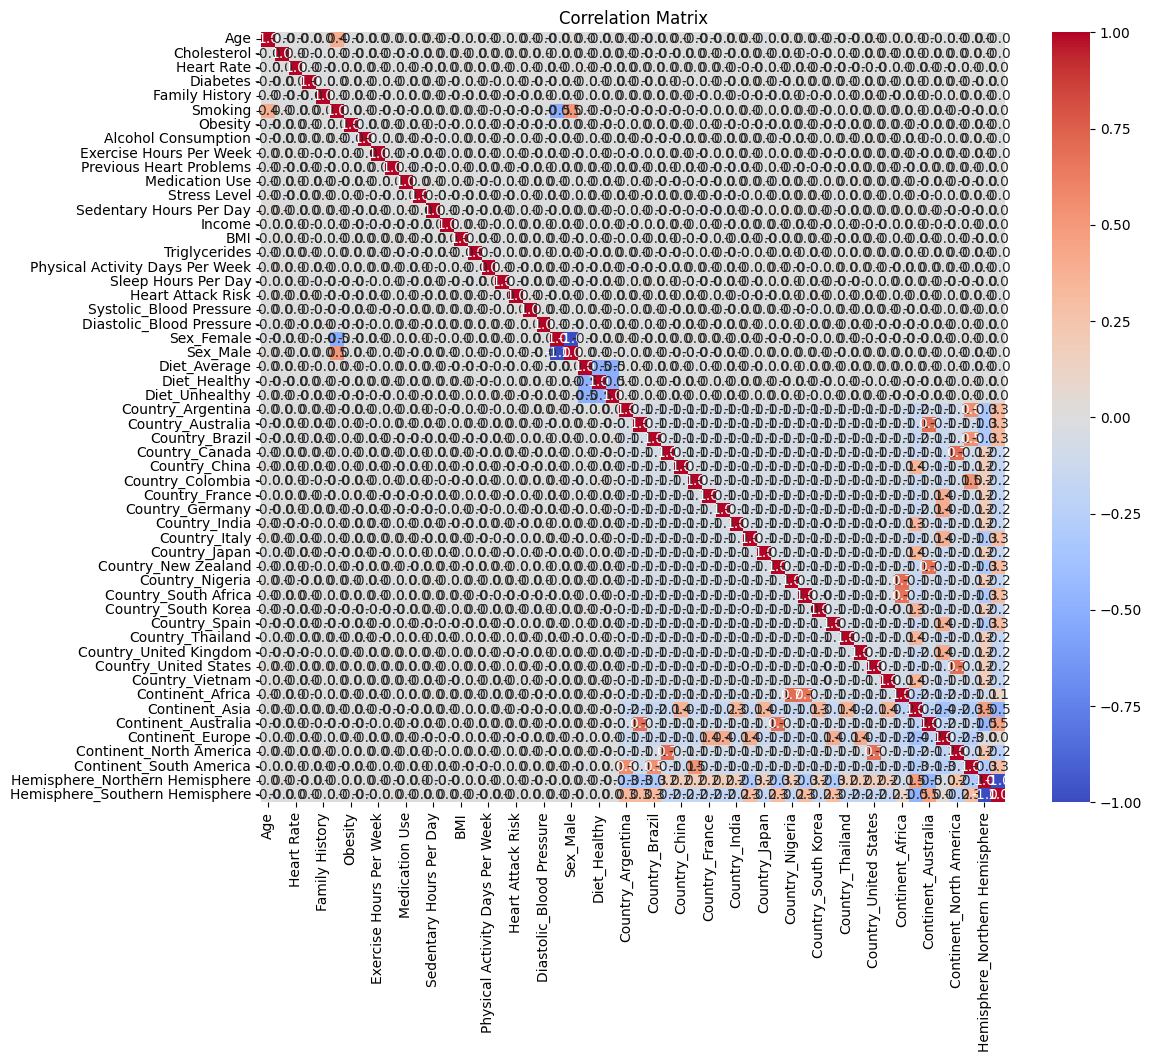

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y = df['Heart Attack Risk']
y.value_counts()

,count
Heart Attack Risk,
0,5622
1,3137


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # Import necessary library

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Heart Attack Risk']), df['Heart Attack Risk'], test_size=0.2, random_state=42) # Split data

smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_smote.value_counts()

,count
Heart Attack Risk,
1,4497
0,4497


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a list of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
]

# Loop through the models and evaluate
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(x_train_smote, y_train_smote)

    # Make predictions
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30) # Separator for better readability


Training and evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5176940639269406
              precision    recall  f1-score   support

           0       0.65      0.53      0.59      1125
           1       0.37      0.49      0.42       627

    accuracy                           0.52      1752
   macro avg       0.51      0.51      0.50      1752
weighted avg       0.55      0.52      0.53      1752

Confusion Matrix:
[[597 528]
 [317 310]]
------------------------------
Training and evaluating Decision Tree...
Accuracy: 0.4863013698630137
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1125
           1       0.30      0.34      0.32       627

    accuracy                           0.49      1752
   macro avg       0.46      0.45      0.45      1752
weighted avg       0.50      0.49      0.49      1752

Confusion Matrix:
[[641 484]
 [416 211]]
------------------------------
Training and evaluating Support Vector Machine...
Accuracy: 0.6067351598173516
              precision 

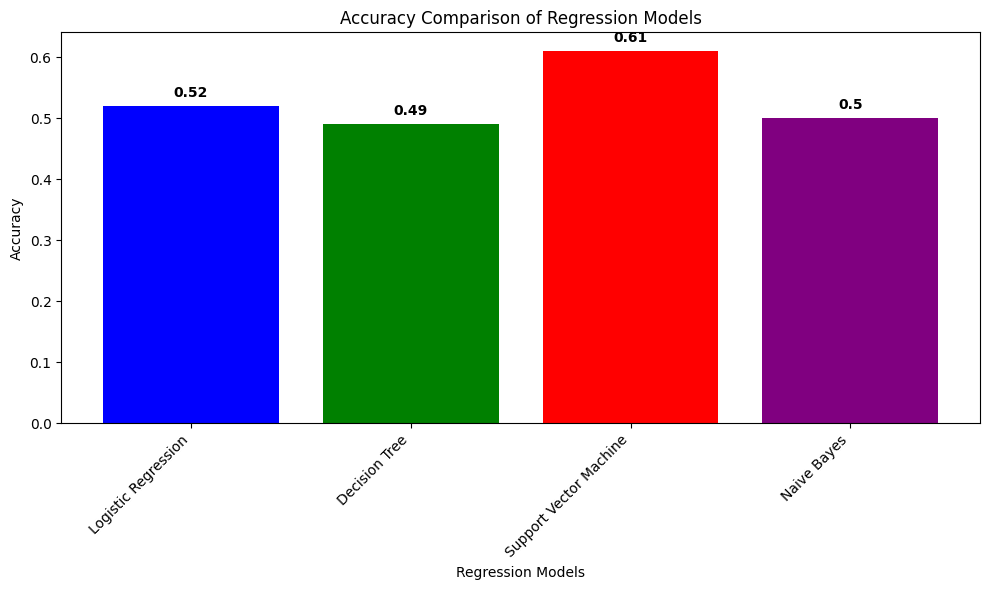

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Naive Bayes']
accuracy_scores = [0.52, 0.49, 0.61, 0.50]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])

plt.xlabel('Regression Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')

# Add text labels for accuracy
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontweight='bold') # Adjust position as needed

plt.tight_layout()
plt.show()


Decision Tree Accuracy: 0.4863013698630137
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1125
           1       0.30      0.34      0.32       627

    accuracy                           0.49      1752
   macro avg       0.46      0.45      0.45      1752
weighted avg       0.50      0.49      0.49      1752

Decision Tree Confusion Matrix:
[[641 484]
 [416 211]]


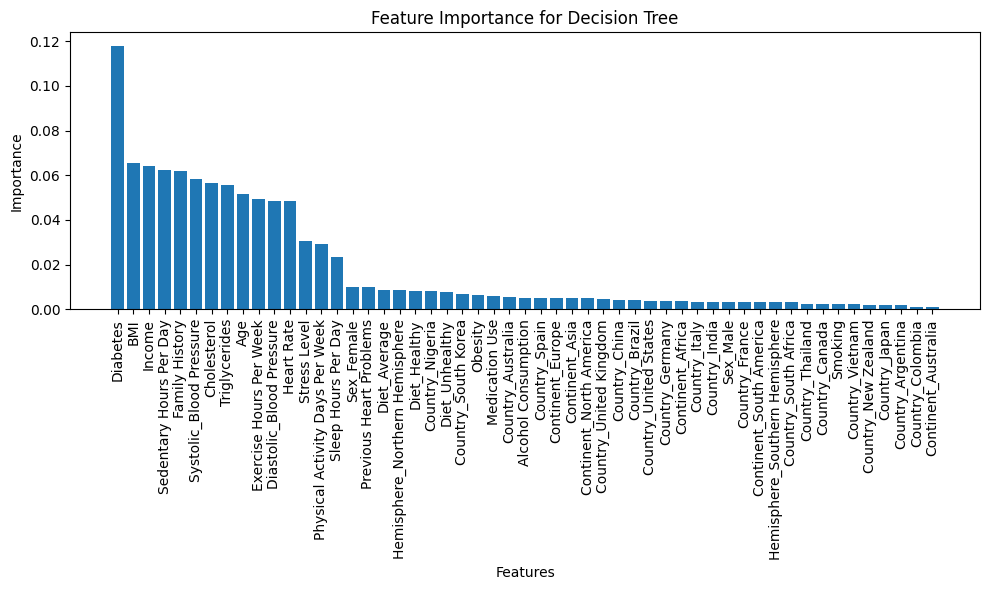

In [ ]:
# prompt: train decision tree and give  feature importance and plot

import pandas as pd
# Assuming 'x_train_smote', 'y_train_smote', and 'x_test' are already defined from the previous code.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
importances = []

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_smote, y_train_smote)

# Make predictions
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: train the top 10 highest impacting factor whic give in decision tree feature importance

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Print the top 10 features
print("Top 10 features:")
print(top_10_features)

# Train a new model using only the top 10 features
x_train_top_10 = x_train_smote[top_10_features['Feature']]
x_test_top_10 = x_test[top_10_features['Feature']]

dt_classifier_top_10 = DecisionTreeClassifier(random_state=42)
dt_classifier_top_10.fit(x_train_top_10, y_train_smote)

# Make predictions with the top 10 features
y_pred_top_10 = dt_classifier_top_10.predict(x_test_top_10)

# Evaluate the model with the top 10 features
accuracy_top_10 = accuracy_score(y_test, y_pred_top_10)
print(f"\nDecision Tree Accuracy (Top 10 Features): {accuracy_top_10}")
print(classification_report(y_test, y_pred_top_10))
print("Decision Tree Confusion Matrix (Top 10 Features):")
print(confusion_matrix(y_test, y_pred_top_10))


Top 10 features:
                    Feature  Importance
3                  Diabetes    0.118110
14                      BMI    0.065373
13                   Income    0.064289
12  Sedentary Hours Per Day    0.062303
4            Family History    0.062132
18  Systolic_Blood Pressure    0.058521
1               Cholesterol    0.056768
15            Triglycerides    0.055884
0                       Age    0.051495
8   Exercise Hours Per Week    0.049600

Decision Tree Accuracy (Top 10 Features): 0.5234018264840182
              precision    recall  f1-score   support

           0       0.64      0.59      0.62      1125
           1       0.35      0.40      0.37       627

    accuracy                           0.52      1752
   macro avg       0.50      0.50      0.49      1752
weighted avg       0.54      0.52      0.53      1752

Decision Tree Confusion Matrix (Top 10 Features):
[[669 456]
 [379 248]]


In [ ]:
import joblib
# Assuming you want to save 'dt_classifier_top_10'
joblib.dump(dt_classifier_top_10, 'linear_regression_model.pk1')

['linear_regression_model.pk1']

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#Load the trained model
model = joblib.load('linear_regression_model.pk1')

#Streamlit App
st.title(" heart attack Prediction")
st.write("Enter the input values for prediction.")

#input fields for each feature
Age = st.number_input("Age",min_value=18,max_value=90,step=1,value=30)
Cholesterol = st.number_input("Cholesterol",min_value=120,max_value=400,step=1,value=200)
Diabetes = st.selectbox("Diabetes",options=["Yes","No"])
Family_History = st.selectbox("Family_History",options=["Yes","No"])
Exercise_Hours_per_Week = st.number_input("Exercise Hours per Week",min_value=0,max_value=20,step=1,value=10)
Sedentary_Hours_Per_Day = st.number_input("Sedentary Hours Per Day",min_value=0,max_value=12,step=1,value=5)
Income = st.number_input("Income",min_value=20062,max_value=299954,step=1,value=50000)
BMI = st.number_input("BMI",min_value=18,max_value=40,step=1,value=20)
Triglycerides = st.number_input("Triglycerides",min_value=30,max_value=800,step=1,value=200)
Systolic_Blood_Pressure = st.number_input("Systolic_Blood Pressure",min_value=90,max_value=180,step=1,value=100)
#Normalization function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

#Load Min-Max values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

#Normalization inputs
Age_norm = min_max_scale(Age, *min_max_values['Age'])
Cholesterol_norm = min_max_scale(Cholesterol, *min_max_values['Cholesterol'])
Exercise_Hours_per_Week_norm = min_max_scale(Exercise_Hours_per_Week,*min_max_values['Exercise Hours Per Week'])
Sedentary_Hours_Per_Day_norm = min_max_scale(Sedentary_Hours_Per_Day, *min_max_values['Sedentary Hours Per Day'])
Income_norm = min_max_scale(Income, *min_max_values['Income'])
BMI_norm = min_max_scale(BMI, *min_max_values['BMI'])
Triglycerides_norm = min_max_scale(Triglycerides, *min_max_values['Triglycerides'])
Systolic_Blood_Pressure_norm = min_max_scale(Systolic_Blood_Pressure, *min_max_values['Systolic_Blood Pressure'])

# prepare input data prediction
input_data = np.array([[Age_norm,Cholesterol_norm,Diabetes_norm,Family_History_norm,Excercise_Hours_per_Week_norm,Sedentary_Hours_Per_Day_norm,
Income_norm,BMI_norm,Triglycerides_norm,Systolic_Blood_Pressure_norm]]).reshape(1, -1)

# Make prediction
if st.button("Predict Heart Attack"):
  prediction = model.predict(input_data)
  if prediction[0] == 1:
        st.error("*Having Heart Attack*")
  else:
        st.success("*Not having Heart Attack*")
  st.success(f'Predicted Heart Attack: {prediction[0]:.2f}')
"""


with open ('app.py','w') as f:
  f.write(streamlit_code)



In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqM1nLRXUjWoecw6HLvNMxNwGK_2y2Yj5pg3YiigXajAMKde")

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect('8501')
print(f"stramlit App is live at{public_url}")

stramlit App is live atNgrokTunnel: "https://bb14-34-173-210-74.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok